# An image classifier for a store

In [1]:
import numpy as np
import pandas as pd
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    tf.config.experimental.set_memory_growth(gpus[0], True)
    print('GPU', tf.test.gpu_device_name(), 'configured')

GPU /device:GPU:0 configured


In [3]:
data, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [5]:
metadata

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='/home/milton/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      aut

In [7]:
train, test = data['train'], data['test']

In [10]:
class_names = metadata.features['label'].names
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [12]:
# normalize data
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255 #Aqui lo pasa de 0-255 a 0-1
    return images, labels

# Normalize train and test
train = train.map(normalize)
test = test.map(normalize)

# Cache data to memory for improving speed
train = train.cache()
test = test.cache()

In [24]:
#Show training data
image, label = next(iter(train.take(1)))
image = image.numpy().reshape((28,28)) 
print(class_names[label])

Pullover


In [ ]:
for imagen, etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((28,28)) #Redimensionar, cosas de tensores, lo veremos despues

import matplotlib.pyplot as plt

#Dibujar dibujar
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

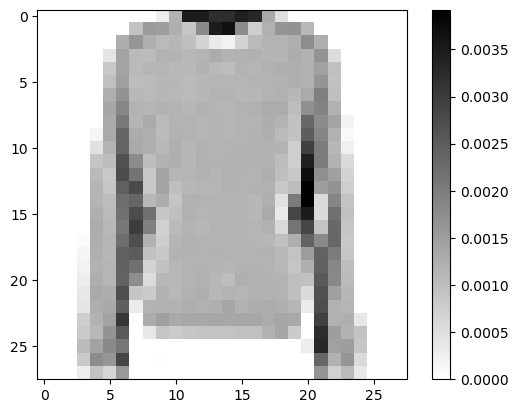

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

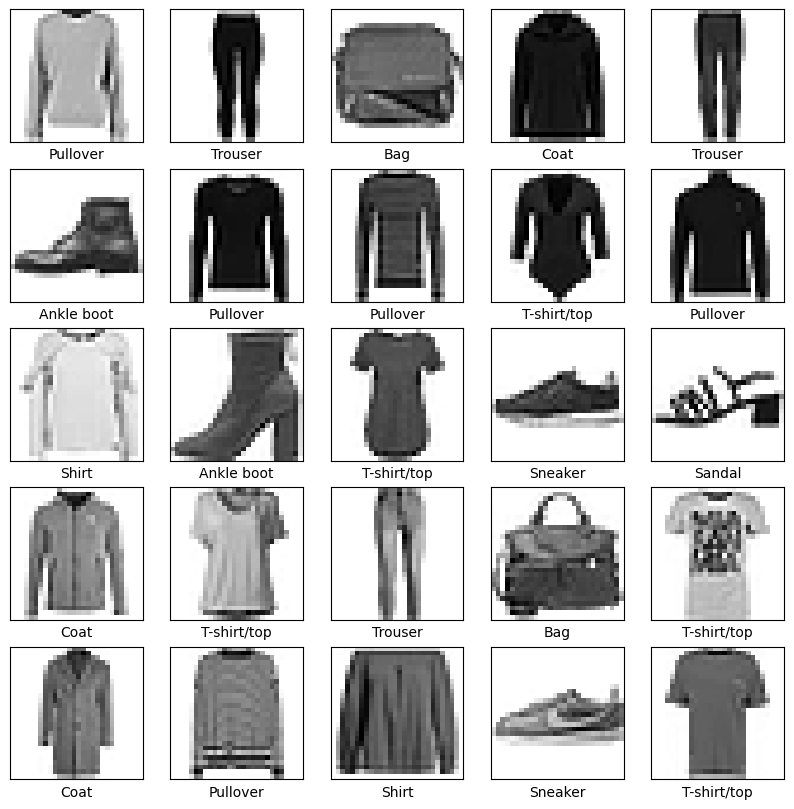

In [29]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

In [32]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1)), 
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
])

In [33]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [35]:
train_count = metadata.splits["train"].num_examples
test_count = metadata.splits["test"].num_examples
train_count, test_count

(60000, 10000)

In [36]:
batch_size = 32

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria para que la red
#no se vaya a aprender el orden de las cosas
train = train.repeat().shuffle(train_count).batch(batch_size)
test = test.batch(batch_size)

In [39]:
import math

#Entrenar
history = model.fit(train, epochs=5, steps_per_epoch= math.ceil(train_count/batch_size))

Epoch 1/5
1875/1875 [==============================] - 9s 2ms/step - loss: 1.0097 - accuracy: 0.6286
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6323 - accuracy: 0.7648
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5673 - accuracy: 0.7944
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5209 - accuracy: 0.8125
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4948 - accuracy: 0.8227


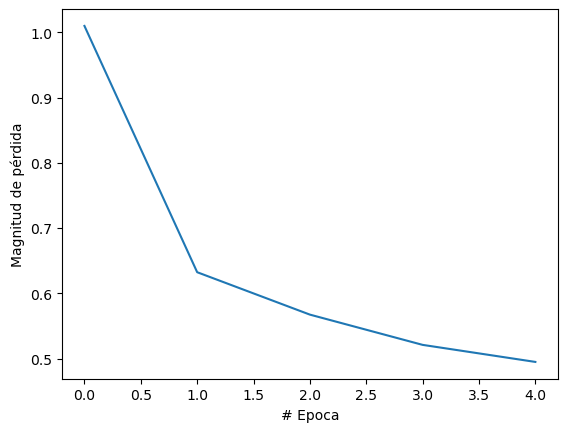

In [40]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history["loss"])

[[[0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [4.6136101e-05]
  [0.0000000e+00]
  [1.0918878e-03]
  [2.6451366e-03]
  [1.8608228e-03]
  [1.7993080e-03]
  [1.7993080e-03]
  [2.6912726e-03]
  [1.9992313e-03]
  [0.0000000e+00]
  [0.0000000e+00]
  [1.5378702e-05]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]]

 [[0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [1.5378702e-05]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [2.5528644e-03]
  [2.1530183e-03]
  [1.7224145e-03]
  [2.9219531e-03]
  [2.7681661e-03]
  [2.2299117e-03]
  [2.5221070e-03]
  [1.8454441e-04]
  [0.0000000e+00]
  [0.0000000e+00]
  [1.5378702e-05]
  [1.5378702e-05]
  [1.5378702e-05]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.000

1/1 [==============================] - 0s 11ms/step


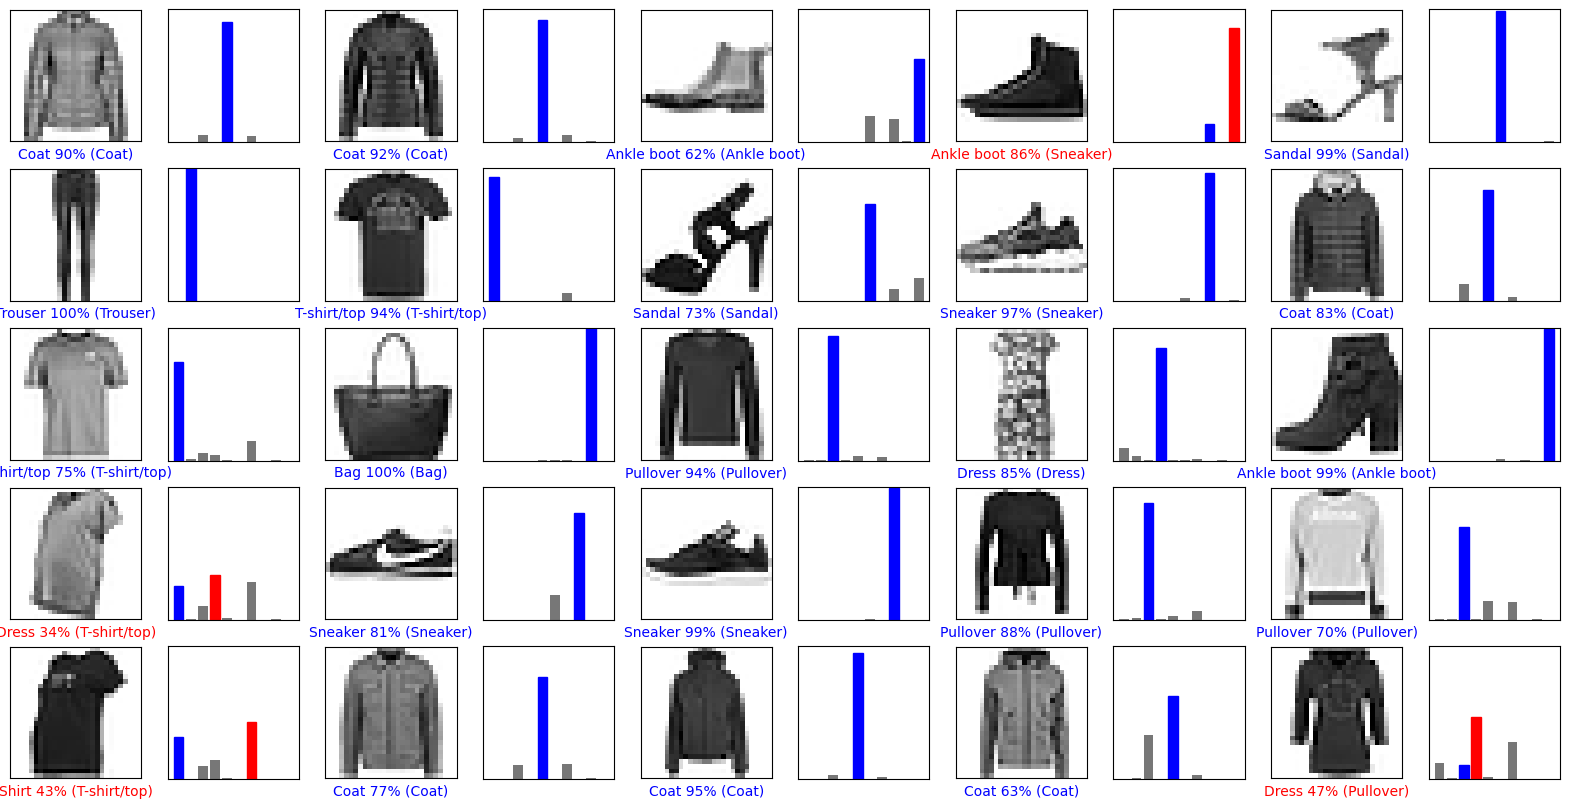

In [62]:
# Paint a grid with multiple predictions and mark them as correct (blue) or incorrect (red)
import numpy as np

for test_images, test_labels in test.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)
  
def plot_image(i, prediction_array, true_labels, images):
    prediction_array, true_label, img = prediction_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[...,0], cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(prediction_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, prediction_array, true_label):
    prediction_array, true_label = prediction_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    bar_plot = plt.bar(range(10), prediction_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(prediction_array)

    bar_plot[predicted_label].set_color('red')
    bar_plot[true_label].set_color('blue')
  
rows = 5
columns = 5
num_images = rows * columns
plt.figure(figsize=(2*2*columns, 2*rows))
for i in range(num_images):
    plt.subplot(rows, 2*columns, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(rows, 2*columns, 2*i+2)
    plot_value_array(i, predictions, test_labels)


In [73]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *

width = 200  # canvas width
height = 200 # canvas height
center = height//2
white = (255, 255, 255) # canvas back

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=15)
    draw.line([x1, y1, x2, y2],fill="black",width=15)
   
master = Tk()

def close_window():
    master.destroy()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

button=Button(text="close",command=close_window)
button.pack()

master.mainloop()

resized_image = output_image.resize((28, 28))

# Convert the image to grayscale
grayscale_image = resized_image.convert("L")

# Convert the image to a NumPy array
image_array = np.array(grayscale_image)

normalized_image = image_array / 255.0
# reshaped_image = np.reshape(normalized_image, (1, 28*28))
# reshaped_image = reshaped_image.astype(np.float32)
predictions = model.predict(1 - normalized_image)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Print the predicted class index
print("Predicted class index:", class_names[predicted_class_index])

1/1 [==============================] - 0s 27ms/step
Predicted class index: Sandal


The problem here are that the pixel positions are features, so you cannot move the images, because the features are changed. For that, we need to deal with other type of network ... CNNs